## Phase 1 Project Submission

Please fill out:
* Student name: Cameron Blakeley
* Student pace: full time
* Scheduled project review date/time: 3/11/2022 @1pm CST
* Instructor name: David Elliot
* Blog post URL:https://datacameron.blogspot.com/


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import zipfile 

In [2]:
bom_data = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [5]:
df = bom_data #Defining my dataframe

In [6]:
df.head(10)  #Examing the top 10 within the dataset

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [7]:
df.sort_values(by=['domestic_gross'], ascending=False).head(10)   #Sorting the top 10 films by domestic gross

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
3082,Incredibles 2,BV,608600000.0,634200000,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2759,Beauty and the Beast (2017),BV,504000000.0,759500000,2017
2324,Finding Dory,BV,486300000.0,542300000,2016


In [8]:
df.drop('studio', axis=1) #Dropping the studio column to clean up the table a bit 

,title,domestic_gross,foreign_gross,year
0,Toy Story 3,415000000.0,652000000,2010
1,Alice in Wonderland (2010),334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000,2010
3,Inception,292600000.0,535700000,2010
4,Shrek Forever After,238700000.0,513900000,2010
...,...,...,...,...
3382,The Quake,6200.0,NaN,2018
3383,Edward II (2018 re-release),4800.0,NaN,2018
3384,El Pacto,2500.0,NaN,2018
3385,The Swan,2400.0,NaN,2018


In [9]:
df.info() #Making sure I am understanding what sort of data types I am analyzing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [11]:
df = df.filter(items=['title' , 'domestic_gross'] , axis=1).head(10) #Filtering out my dataframe to include the 2 columns I want to work with

In [12]:
df = df.replace(['Harry Potter and the Deathly Hallows Part 1'],
          value='HPATDH pt.1')
#The title of this film was too long to plot, so I replaced it with it's acronym title

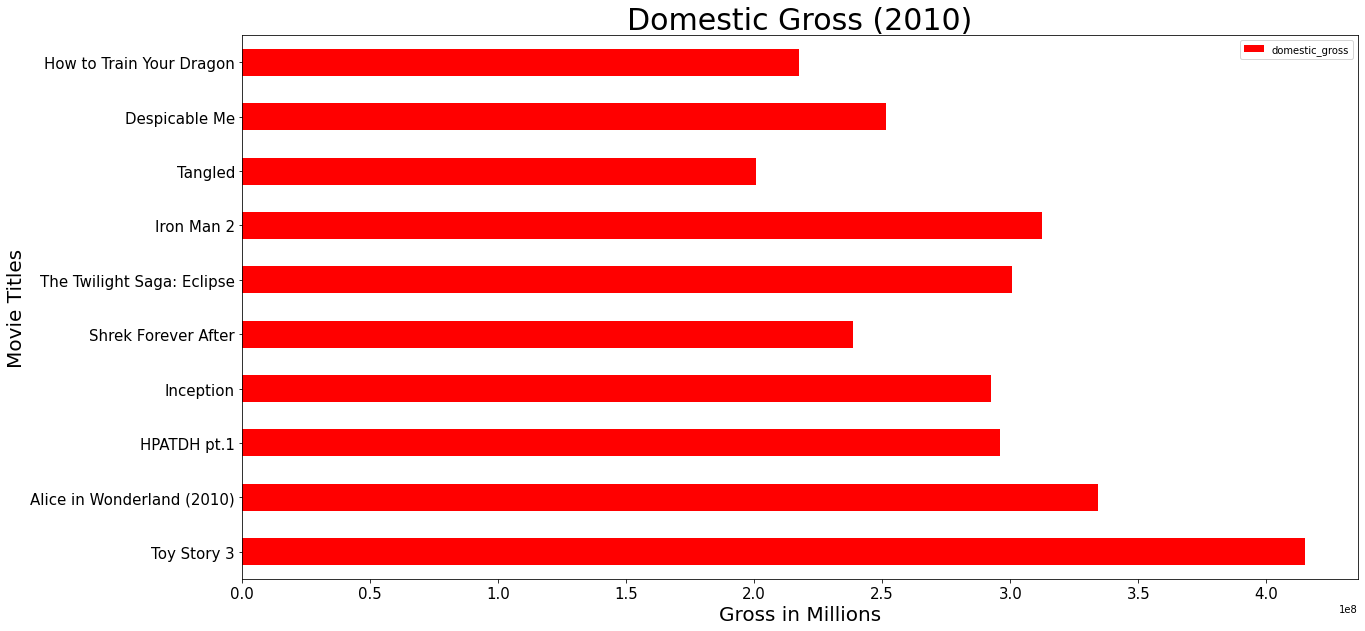

In [13]:
ax = df.plot.barh(x='title', stacked=True, figsize=(20,10), colormap='autumn', fontsize=15)

ax.set_title('Domestic Gross (2010)', fontsize=30)
ax.set_xlabel('Gross in Millions',fontsize=20)
ax.set_ylabel('Movie Titles', fontsize=20)
ax.patch.set_facecolor('none')
ax.patch.set_alpha(0)

In [ ]:
#End result of my bar chart displaying the top domestic grossing films of 2010

In [14]:
# Extract IMDb SQL .db file
with zipfile.ZipFile('./zippedData/im.db.zip') as zipObj:
    # Extract all contents of .zip file into current directory
    zipObj.extractall(path='./zippedData/')
    
# Create connection to IMDb DB
con = sqlite3.connect('./zippedData/im.db')

In [15]:
master = pd.read_sql("""

SELECT *
FROM sqlite_master

""",con)                    #Creating a reference variable to retrieve the various tables

In [16]:
master

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [17]:
pd.read_sql("""

SELECT *
FROM movie_ratings

""",con)             #Analyzing the "movie_ratings table"

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [18]:
pd.read_sql("""

SELECT *
FROM movie_basics

""",con)                    #Analyzing the "movie_basics" table

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [19]:
df = pd.read_sql("""
    SELECT*
    FROM movie_ratings
    LEFT JOIN movie_basics
    USING(movie_id);
    """,con)              #I wanted the movie ratings to be displayed within the movie basics table, so I joined the two tables

In [20]:
df

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


In [21]:
df.sort_values(by=['numvotes'], ascending=False).head(20)  #Analyzing the top 20 films in accordance to number of votes

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
63498,tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
8738,tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller"
24920,tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi"
38058,tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western"
48221,tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"
39356,tt0993846,8.2,1035358,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama"
3140,tt1130884,8.1,1005960,Shutter Island,Shutter Island,2010,138.0,"Mystery,Thriller"
25777,tt2015381,8.1,948394,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy"
60518,tt1431045,8.0,820847,Deadpool,Deadpool,2016,108.0,"Action,Adventure,Comedy"
63506,tt1392170,7.2,795227,The Hunger Games,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi"


In [22]:
df = df.drop(columns='movie_id')
df.drop(columns='start_year')       #Dropping excess columns that I won't be needing

,averagerating,numvotes,primary_title,original_title,runtime_minutes,genres
0,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,117.0,Romance
1,8.9,559,Borderless,Borderless,87.0,Documentary
2,6.4,20,Just Inès,Just Inès,90.0,Drama
3,4.2,50352,The Legend of Hercules,The Legend of Hercules,99.0,"Action,Adventure,Fantasy"
4,6.5,21,Até Onde?,Até Onde?,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...
73851,8.1,25,Caisa,Caisa,84.0,Documentary
73852,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,120.0,"Action,Animation,Sci-Fi"
73853,4.7,14,Sisters,Sisters,NaN,"Action,Drama"
73854,7.0,5,The Projectionist,The Projectionist,81.0,Documentary


In [23]:
df_runtime = df.sort_values(by=['numvotes'], ascending=False).head(20)
df_runtime                        #defining a new variable to analyze the top number of votes

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
63498,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
8738,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller"
24920,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi"
38058,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western"
48221,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"
39356,8.2,1035358,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama"
3140,8.1,1005960,Shutter Island,Shutter Island,2010,138.0,"Mystery,Thriller"
25777,8.1,948394,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy"
60518,8.0,820847,Deadpool,Deadpool,2016,108.0,"Action,Adventure,Comedy"
63506,7.2,795227,The Hunger Games,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi"


In [24]:
df_popular = df_runtime['runtime_minutes'].mean()
df_popular          #Calculating the average runtime minutes of the top 20 films

138.25

In [25]:
df_not_popular = df.sort_values(by=['numvotes'], ascending=False)[20:]     #Sorting the bottom 20 films by number of votes

In [26]:
df_not_popular['runtime_minutes'].mean()          #Calculating the average runtime of the bottom 20 films by number of votes

94.64087229672586

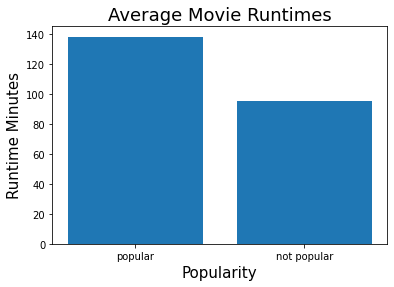

In [27]:
fig, ax = plt.subplots()
ax.bar(x =['popular', 'not popular'] , height=[138, 95]);
ax.set_ylabel('Runtime Minutes', fontsize=15)
ax.set_xlabel('Popularity', fontsize=15)
ax.set_title('Average Movie Runtimes', fontsize=18)
ax.patch.set_facecolor('none')         
ax.patch.set_alpha(0)                      #Plotting a bar chart to display the average runtime of popular and un-popular movies
                                            #where popularity is defined as the number of votes

In [28]:
df = pd.read_csv('zippedData/tmdb.movies.csv.gz')   #imported the data set and defined my dataframe

In [29]:
df.head(5)       #Analyzing the first 5 results

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [30]:
df = df.sort_values(by=['popularity'], ascending=False).head(5)

df                  #Sorting the top 5 movies by popularity ranking

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673


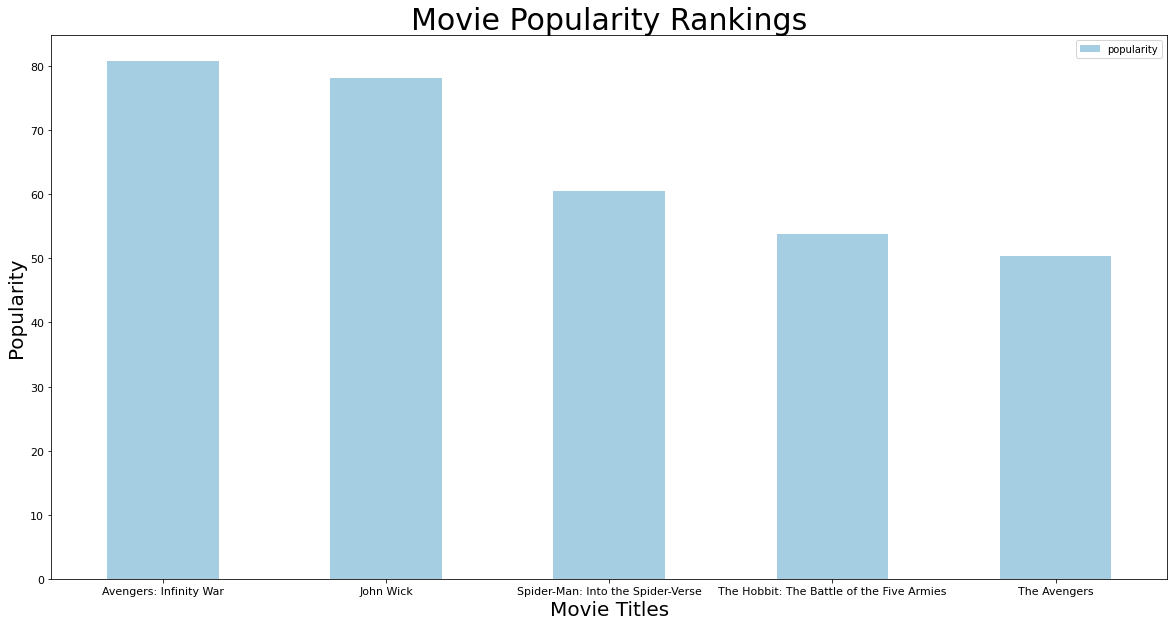

In [31]:
ax = df.plot.bar(x='original_title', y='popularity', figsize=(20,10), colormap='Paired', fontsize=11, rot=0);
ax.set_ylabel('Popularity', fontsize=20)
ax.set_xlabel('Movie Titles', fontsize=20)
ax.set_title('Movie Popularity Rankings (2012-2018)', fontsize=30)
ax.patch.set_facecolor('none')
ax.patch.set_alpha(0)                   #plotting the Movie Popularity rankings 